## Imports

In [2]:
import csv
from pathlib import Path
import pandas
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from functions import *

from pogo_stick_jumping.ODE_Nonlinear import PogoODEnonlinear

In [3]:
save_path = Path.cwd() / "Plots"
if not save_path.exists():
    save_path.mkdir()

## Plot time series jumps of final designs

### Create Empty Lists of Values

In [4]:
# Load in the data from saved files
files = getFilePaths(Path.cwd())

In [5]:
# read in csv files
data = []
for file in files:
    data.append(pandas.read_csv(file))

# create a list for the average of each algorithms data
spring_ks, zetas = [], []
# get the headers of the data
headers = data[0].columns.values
# iterate through each data set
for i in range(len(data)):
    # get the average of each column
    spring_ks.append(np.mean(data[i][headers[0]]))
    zetas.append(np.mean(data[i][headers[1]]))

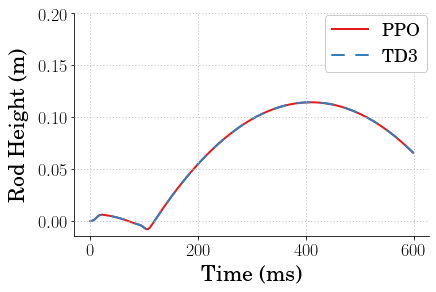

In [8]:
m_act = 1.003               # mass of the pogo-stick rod (kg)
m_rod = 0.175               # mass of the pogo-stick rod (kg)

spring_k = 5760

zeta = 0.075

f = 11.13         # natural freq. (rad)
A_max = 63.2      # max acceleration of actuator (m/s^2)
V_max = 2.0       # max velocity of actuator (m/s)
Distance = 0.008  # Distance to move actuator in jump command (m)
Spring_Limit = -0.008
Spacing = 0.75 * (1 / f)  # Space commands by 0.5*period of oscillation

x_init = 0.0
x_dot_init = 0.0
x_act_init = 0.0
x_act_dot_init = 0.0

heights = []
for ii in range(len(spring_ks)):
    pogo_stick = PogoODEnonlinear(m_act, m_rod, spring_ks[ii], zetas[ii], A_max, V_max, Distance, Spring_Limit, Spacing)
    x0 = [x_init, x_dot_init, x_act_init, x_act_dot_init]
    sim_time, timeseries = pogo_stick.run_simulation(x0, duration=1.0)
    heights.append(timeseries[0])

# Set the plot size - 3x2 aspect ratio is best
# fig = plt.figure(figsize=(6.75, 4.5))
fig = plt.figure(figsize=(6, 4))

ax = plt.gca()

# Define the X and Y axis labels
plt.xlabel(r'Time (ms)', fontsize=22, weight='bold', labelpad=5)
plt.ylabel(r'Rod Height (m)', fontsize=22, weight='bold', labelpad=10)

plt.plot(np.arange(len(heights[0][0:600])), heights[0][0:600], linewidth=2, linestyle='-', label="PPO")
plt.plot(np.arange(len(heights[1][0:600])), heights[1][0:600], linewidth=2, linestyle='--', label="TD3")

# uncomment below and set limits if needed
# plt.xlim(0,4)
plt.ylim(bottom=None, top=0.20)

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
filename = 'timeseries_height.svg'
path = save_path / filename
plt.savefig(path, transparent=True)
filename = 'timeseries_height.png'
path = save_path / filename
plt.savefig(path, transparent=True)
plt.show()